In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [4]:
df=pd.read_csv(r'C:\Users\pedro\source\repos\PedroCorreia07\Machine-Learning-with-Python\Simple Linear Regression Project\FuelConsumptionCo2.csv')#read dataset
df.head()#show first 5 rows of the dataset. If we want to see the first "n" the rows, we can use df.head(n)


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
df.describe()#used for calculating and show some statistical data from the dataframe


,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:
cdf=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]#select some features to explore more
cdf.head(9)#show first 9 rows


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


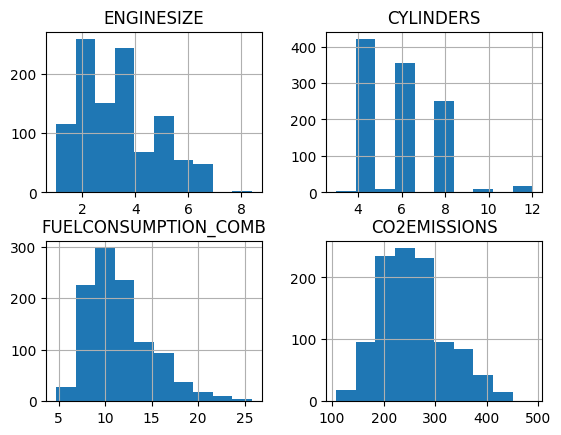

In [7]:

cdf.hist()#used to plot a histogram of the columns (features) of a DataFrame, showing how frequently the values fall into different ranges
plt.show()


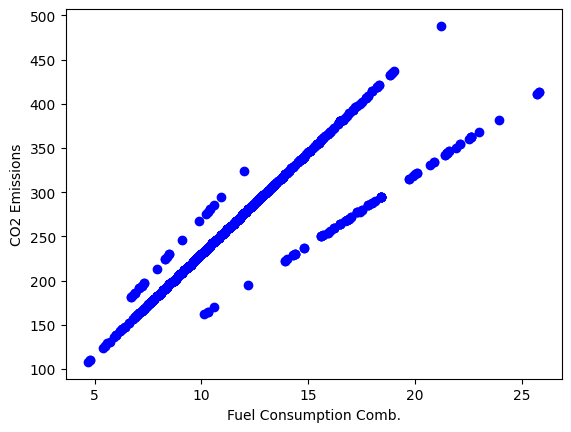

In [8]:
#plot feature Fuel consumption vs CO2 Emissions
plt.scatter(cdf.FUELCONSUMPTION_COMB,cdf.CO2EMISSIONS,color='blue')#function to plot the scatter plot. X-axis is fuel consumption, Y-axis is CO2 emissions. "color='blue" sets the color of the scatter plot.
plt.xlabel("Fuel Consumption Comb.") #function to write the x-axis label
plt.ylabel("CO2 Emissions")#function to write the y-axis label
plt.show()

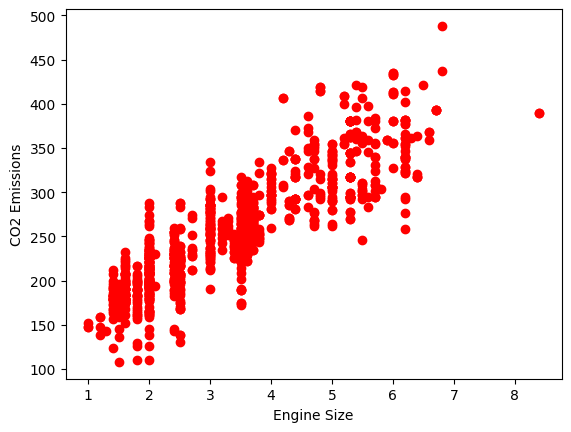

In [9]:
#plot feature engine size vs CO2 Emissions
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color='red')
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")
plt.show()

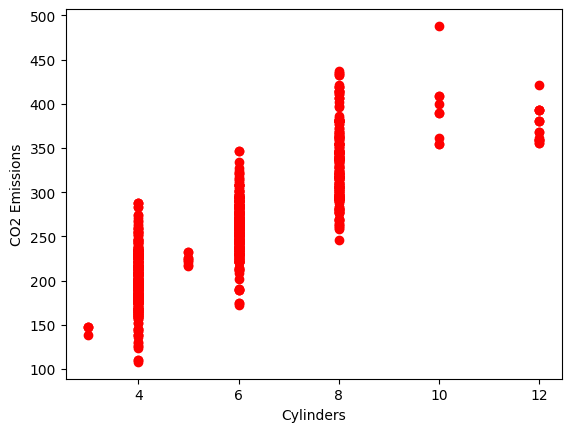

In [10]:
#plot cylinders vs Emissions
plt.scatter(cdf.CYLINDERS,cdf.CO2EMISSIONS,color="red")
plt.xlabel("Cylinders")
plt.ylabel("CO2 Emissions")
plt.show()

CREATING A TRAIN AND TEST DATASET

In [11]:
#This involves splitting the data into train and test sets, which are mutally exclusive.

#Lets split our dataset into using random 80% of the data for training and the rest 20% for testing.

msk=np.random.rand(len(df))<0.8 #'rand' is a function that generates an array of random numbers to make 80% of the data available.
train=cdf[msk] #Defining the train set considering only the features on the cdf dataset instead of the entire dataset (df).
test=cdf[~msk] #'~' represents 'NOT' so [~msk] is everything that is not [msk]

SIMPLE REGRESSION MODEL

Text(0, 0.5, 'CO2 Emissions')

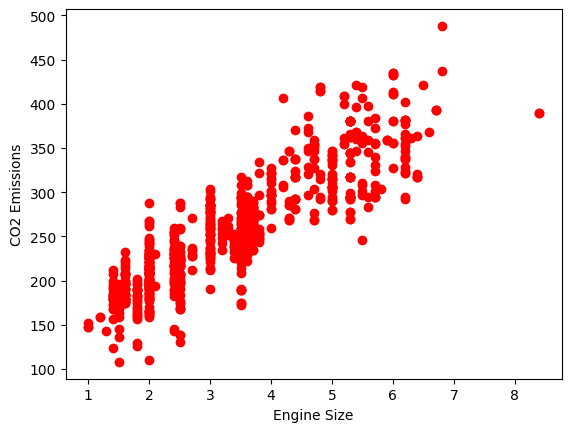

In [12]:
#Now I want to plot the train data distribution
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color="red")
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")

In [13]:
#MODELING using sklearn package
from sklearn import linear_model #this imports the 'linear_model'from the sklearn package. The 'linear_model' module contains classes for implementing various linear models, including linear regression.
regr=linear_model.LinearRegression() #now I'm creating an instance of the 'LinearRegression' class from the 'linear__model' module.
train_x=np.asanyarray(train[['ENGINESIZE']]) #from the "train" dataframe, I'm converting the 'ENGINESIZE' column into a numpy array
train_y=np.asanyarray(train[['CO2EMISSIONS']]) #from the "train" dataframe, I'm converting the 'CO2EMISSIONS' column into a numpy array
regr.fit(train_x,train_y) # this calls the 'fit' method of the 'LinearRegression' class. The fit() function takes the two NumPy arrays as input and calculates the coefficients of the linear regression equation that best fits the data.
                          #The resulting coefficients are stored in the coef_ attribute of the regr object. Once the model is trained, it can be used to make predictions on new data.

#The coefficients
print('Coefficients:',regr.coef_) #prints the "m" of y=mx+b
print('Intercept:',regr.intercept_) #prints the "b" of y=mx+b


Coefficients: [[39.90229646]]
Intercept: [123.06486216]


Text(0, 0.5, 'CO2 missions')

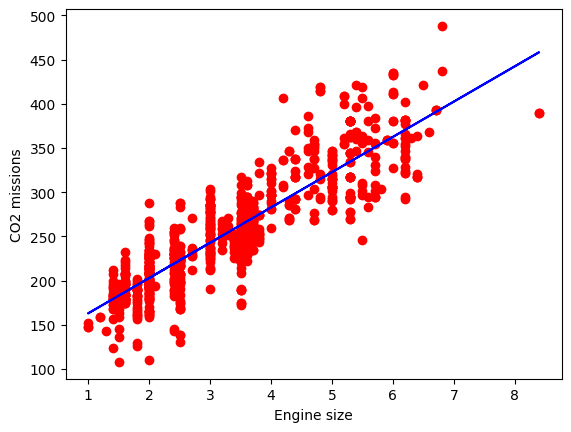

In [14]:
#What to plot the fit line over the data
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color="red")
plt.plot(train_x,regr.coef_[0][0]*train_x+regr.intercept_[0],'-b') #this is to plot hte linear regression line.|| "plt.plot" is to plot the line over the data.||"train_x" is the NumpY array that contains the x-axis (independente variable).|| 
                                                                   #regr.coef[0][0] selects the first coefficient of the linear regression(which is the slope).
                                                                   #regr.intercept_[0] selects the first element of the linear regression(which is the intercept).
plt.xlabel("Engine size")
plt.ylabel("CO2 missions")

EVALUATION OF THE MODEL

In [15]:
#Here I'll compare the predicted values with the actual values to calculate the accuracy of the regression model.
from sklearn.metrics import r2_score #sklearn.metrics is a sub-module of Scikit-learn to evaluate the performance of machine learning models.|| r2_score  function is used to calculate the coefficient of determination (R^2) of a regression model. R squares is a measure that ranges from 0 to 1. The higher values indicate a better fit between the predicted values and the actual values
test_x=np.asanyarray(test[['ENGINESIZE']]) #from the "test" dataframe, I'm converting the 'ENGINESIZE' column into a numpy array
test_y=np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat=regr.predict(test_x) #I'm using predict() method (linear regression) to predict the test_y_hat values using the test_x values. 

print("Mean absolute error: %.2f"%np.mean(np.absolute(test_y_hat-test_y))) #calculate the mean absolute error between the actual and predicted test_y values 
print("Residual sum of squares (MSE):%.2f"%np.mean((test_y_hat-test_y)**2)) #calculate the residual sum of squares|| %.2f is tells python to display a floating-point number with 2 decimal places
print("R2-score:%.2f"%r2_score(test_y_hat,test_y)) # calculate the R2-score of the regression model. As R2-score ranges from 0 to 1, the higher values indicate a better fit

Mean absolute error: 24.01
Residual sum of squares (MSE):1004.37
R2-score:0.71
